In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
unique,counts=np.unique(ytrain,return_counts=True)
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [8]:
trainlabels=dict(zip(unique,counts))
trainlabels

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [9]:
index=np.random.randint(0,xtrain.shape[0],size=25)
index

array([40907, 19204, 27148, 25897, 52613, 51614, 38085, 49812, 16663,
       16680, 27595, 44921, 12896, 18216, 48141, 57933, 40747, 15161,
       23671, 52611, 59988, 34684, 53069, 12404, 23406])

In [10]:
var1=xtrain[index]
var2=ytrain[index]
var1.shape

(25, 28, 28)

In [11]:
var2.shape

(25,)

In [12]:
var2

array([6, 8, 0, 7, 0, 2, 8, 7, 3, 4, 6, 4, 7, 2, 6, 2, 2, 4, 5, 2, 7, 3,
       5, 2, 4], dtype=uint8)

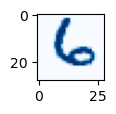

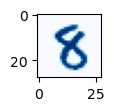

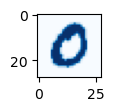

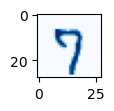

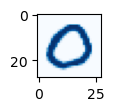

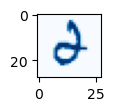

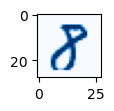

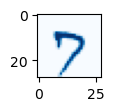

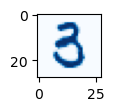

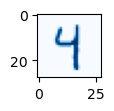

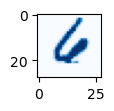

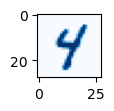

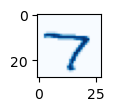

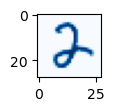

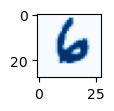

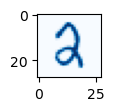

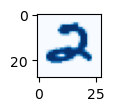

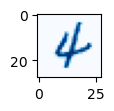

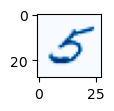

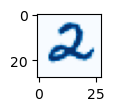

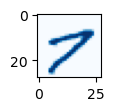

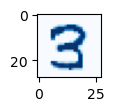

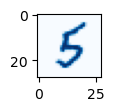

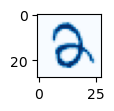

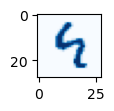

In [13]:
plt.figure(figsize=(5,5))
for i in range(len(index)):
    plt.subplot(5,5,i+1)
    image=var1[i]
    plt.imshow(image,cmap="Blues")
    plt.show()
    plt.savefig("mnist.png")
    plt.close("all")

In [14]:
f=len(np.unique(ytrain))
f

10

In [15]:
ytrain[0]

5

In [16]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
gf=xtrain.shape[1]
gf

28

In [18]:
hg=gf*gf
hg

784

In [19]:
xtrain=np.reshape(xtrain,[-1,hg])
xtrain=xtrain.astype("float32")/255
xtest=np.reshape(xtest,[-1,hg])
xtest=xtest.astype("float32")/255


In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [21]:
qw=128
hidden=256
dropout=0.45


In [22]:
model=Sequential()
model.add(Dense(hidden,input_dim=hg))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(hidden))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(f))
model.add(Activation("softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                

In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
#from IPython.display import Image
#Image(filename="mnist.png")

In [26]:
#from keras.utils import plot_model
#plot_model(model,to_file="mlp-mnist.png",show_shapes="True")

In [27]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [28]:
model.fit(xtrain,ytrain,epochs=20,batch_size=qw)

Epoch 1/20


469/469 [==============================] - 5s 8ms/step - loss: 0.4240 - accuracy: 0.8701
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1942 - accuracy: 0.9429
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1535 - accuracy: 0.9538
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1266 - accuracy: 0.9619
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1153 - accuracy: 0.9648
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1015 - accuracy: 0.9689
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0893 - accuracy: 0.9717
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0868 - accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0796 - accuracy: 0.9749
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0736 - accuracy: 0.9

In [29]:
loss,accuracy=model.evaluate(xtest,ytest,batch_size=qw)

79/79 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9834


In [30]:
print("\n test accuracy : %.1f%%" %(100.0*accuracy))


 test accuracy : 98.3%
